# Applying custom preprocessing to images

In [1]:
import cv2
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
print(tf.__version__)

2.12.0


In [218]:
def apply_CLAHE_filter(image, clipLimit=2.0, tileGridSize=(8,8),
                        plot_filter=False):
    clahe = cv2.createCLAHE(clipLimit=clipLimit,
                            tileGridSize=tileGridSize)
    image = clahe.apply(tf.make_ndarray(tf.make_tensor_proto(image)))
    print('Filter applied successfully!')

    if plot_filter == True:
        plt.imshow(image, cmap='gray')
        plt.title('CLAHE filter')
        plt.axis('off')

    return image

In [219]:
def read_and_decode(filename, preprocessing=0):
    # 1-> Read the file
    img = tf.io.read_file(filename)
    # 2-> Convert compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=1)
    # 3 -> Custom preprocessing
    img = tf.convert_to_tensor(apply_CLAHE_filter(img))
    # 4-> Convert 3D uint8 to floats in the range [0,1]
    img = tf.image.convert_image_dtype(img, tf.float32)    
    return tf.convert_to_tensor(tf.expand_dims(img, axis=-1))

def decode_csv(csv_row):
    record_defaults = ["filepaths", "labels"]
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename)
    # label = tf.math.equal(CLASS_NAMES, label_string)
    return tf.convert_to_tensor(img), tf.convert_to_tensor(label_string)

In [220]:
read_and_decode("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/16754_1801566584.png")

Filter applied successfully!


<tf.Tensor: shape=(256, 256, 1), dtype=float32, numpy=
array([[[0.8078432 ],
        [0.79215693],
        [0.73333335],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       [[0.73333335],
        [0.6666667 ],
        [0.70980394],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       [[0.6666667 ],
        [0.63529414],
        [0.72156864],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       ...,

       [[0.54509807],
        [0.48627454],
        [0.48627454],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       [[0.53333336],
        [0.4666667 ],
        [0.3803922 ],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]],

       [[0.48627454],
        [0.38823533],
        [0.3803922 ],
        ...,
        [0.01176471],
        [0.01176471],
        [0.01176471]]], dtype=float32)>

In [222]:
x = decode_csv("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/16754_1801566584.png,0")

Filter applied successfully!


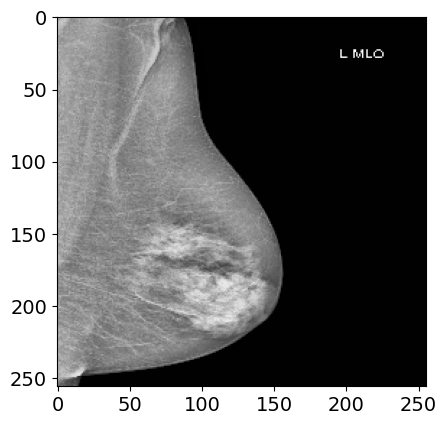

In [228]:
plt.imshow(x[0], cmap="gray");

In [212]:
dataset = (tf.data.TextLineDataset("new_train.csv")).map(decode_csv)

TypeError: in user code:

    File "C:\Users\pedro\AppData\Local\Temp\ipykernel_1052\3848176840.py", line 15, in decode_csv  *
        img = read_and_decode(filename)
    File "C:\Users\pedro\AppData\Local\Temp\ipykernel_1052\2570852225.py", line 7, in read_and_decode  *
        img = tf.convert_to_tensor(apply_CLAHE_filter(img))
    File "C:\Users\pedro\AppData\Local\Temp\ipykernel_1052\1189794049.py", line 5, in apply_CLAHE_filter  *
        image = clahe.apply(tf.make_ndarray(tf.make_tensor_proto(image)))

    TypeError: Expected any non-tensor type, but got a tensor instead.


In [200]:
print(dataset)

<TextLineDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [202]:
for element in dataset.as_numpy_iterator():
      decode_csv(element)

Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied

Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied

Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied

Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied

Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied

Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied successfully!
Filter applied

In [207]:
dataset.take(1)

<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

TypeError: Cannot iterate over a scalar tensor.

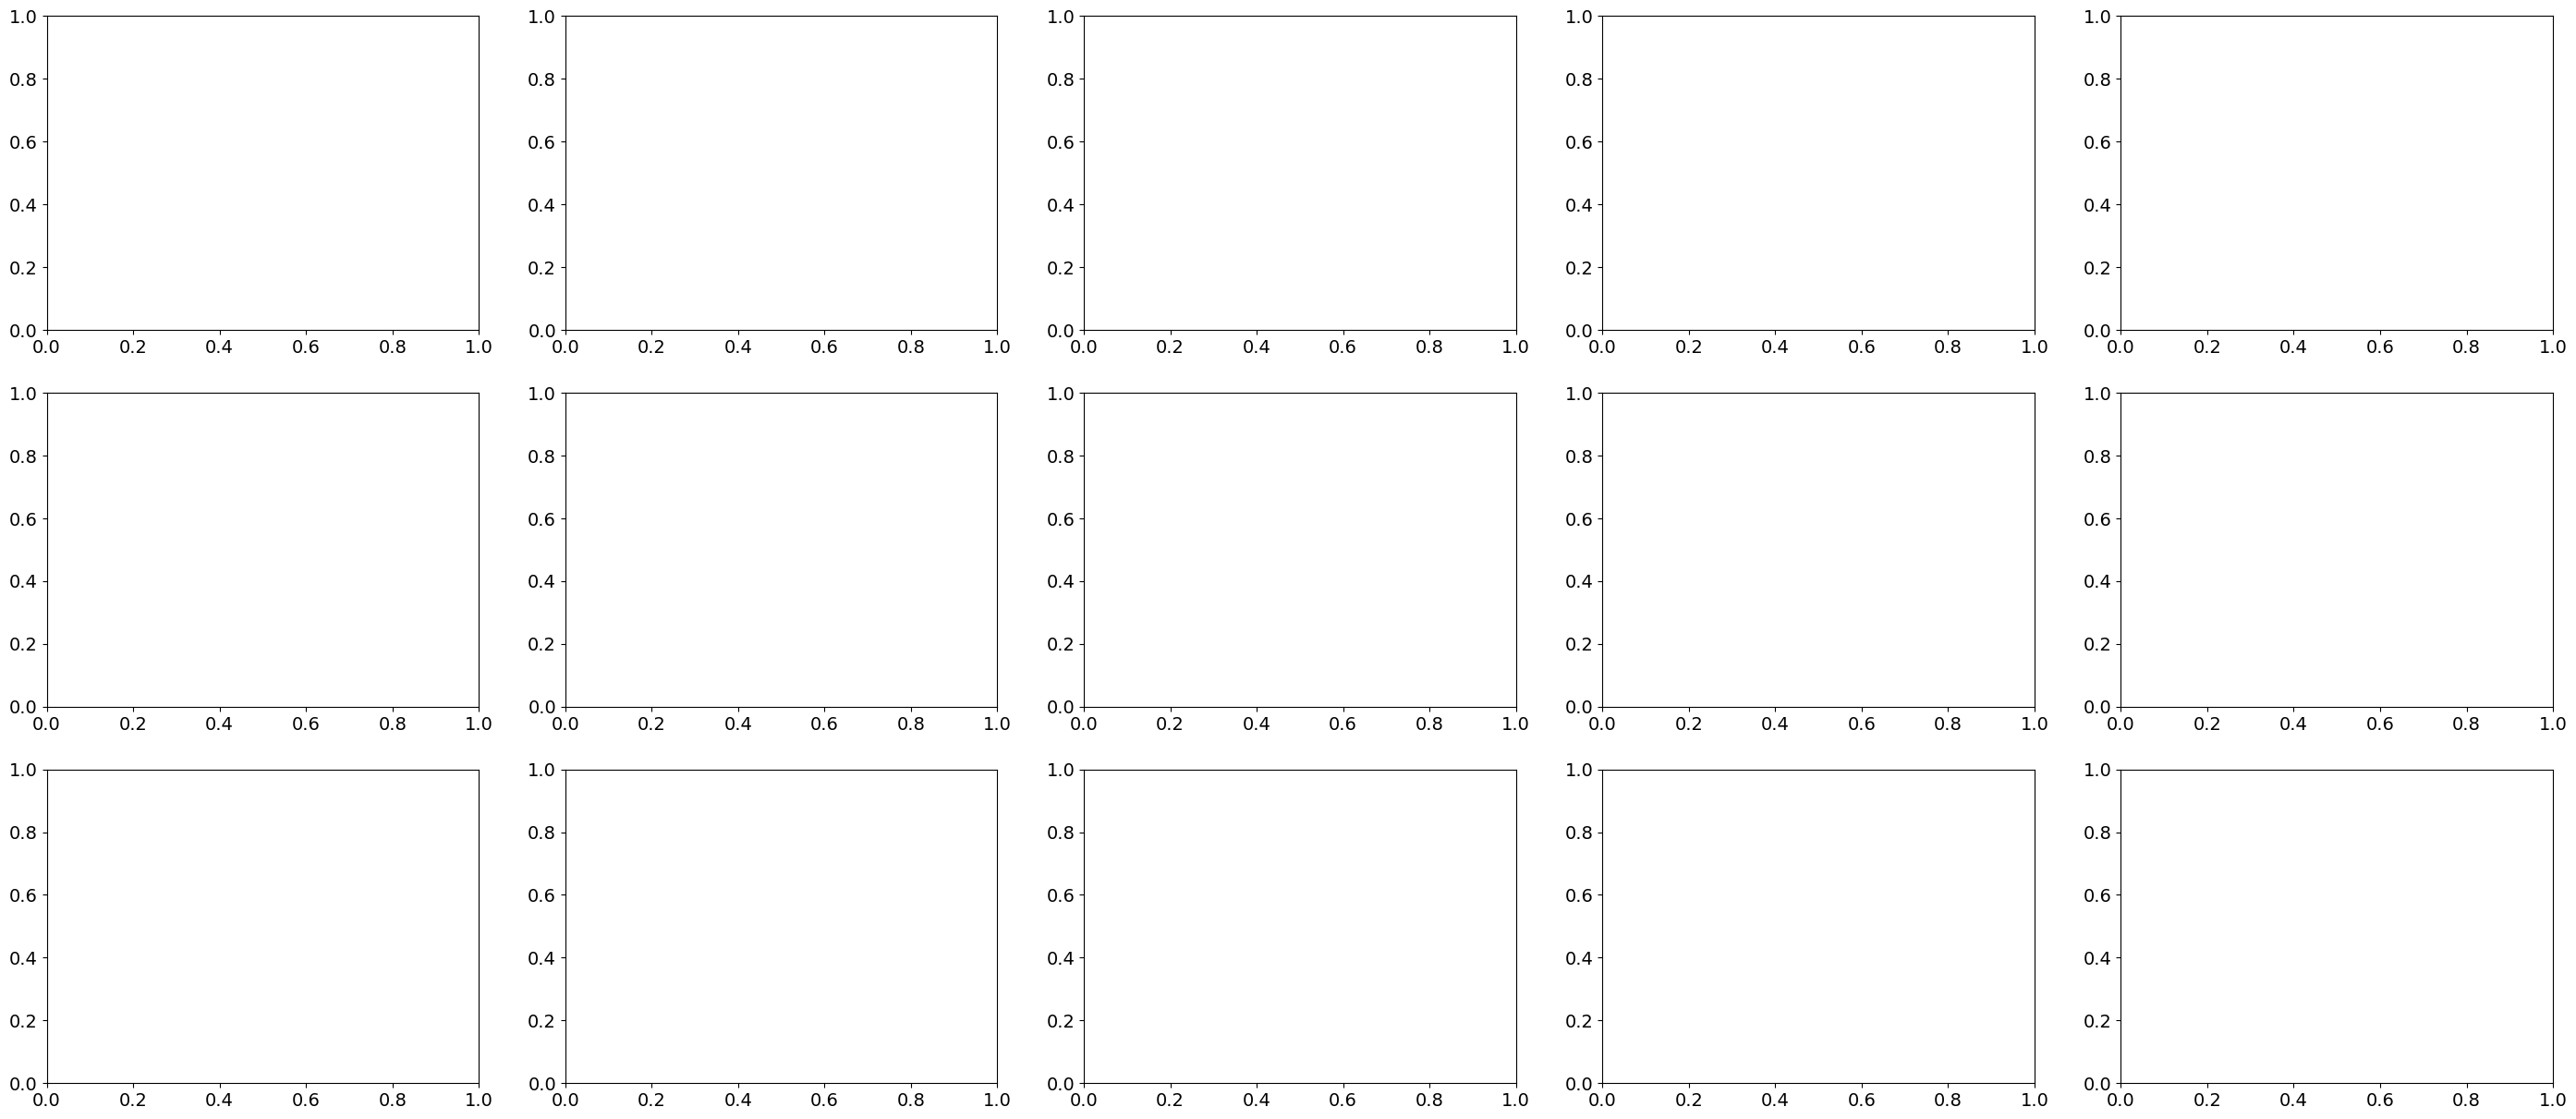

In [204]:
matplotlib.rcParams.update({'font.size': 14})
f, ax = plt.subplots(3, 5, figsize=(35,15))

for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()));
    ax[idx//5, idx%5].axis('off')

In [148]:
def plot_images(filename):
    matplotlib.rcParams.update({'font.size': 14})
    f, ax = plt.subplots(3, 5, figsize=(35,15))
    dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
    for idx, (img, label) in enumerate(dataset.take(15)):
        ax[idx//5, idx%5].imshow((img.numpy()));
        ax[idx//5, idx%5].axis('off')

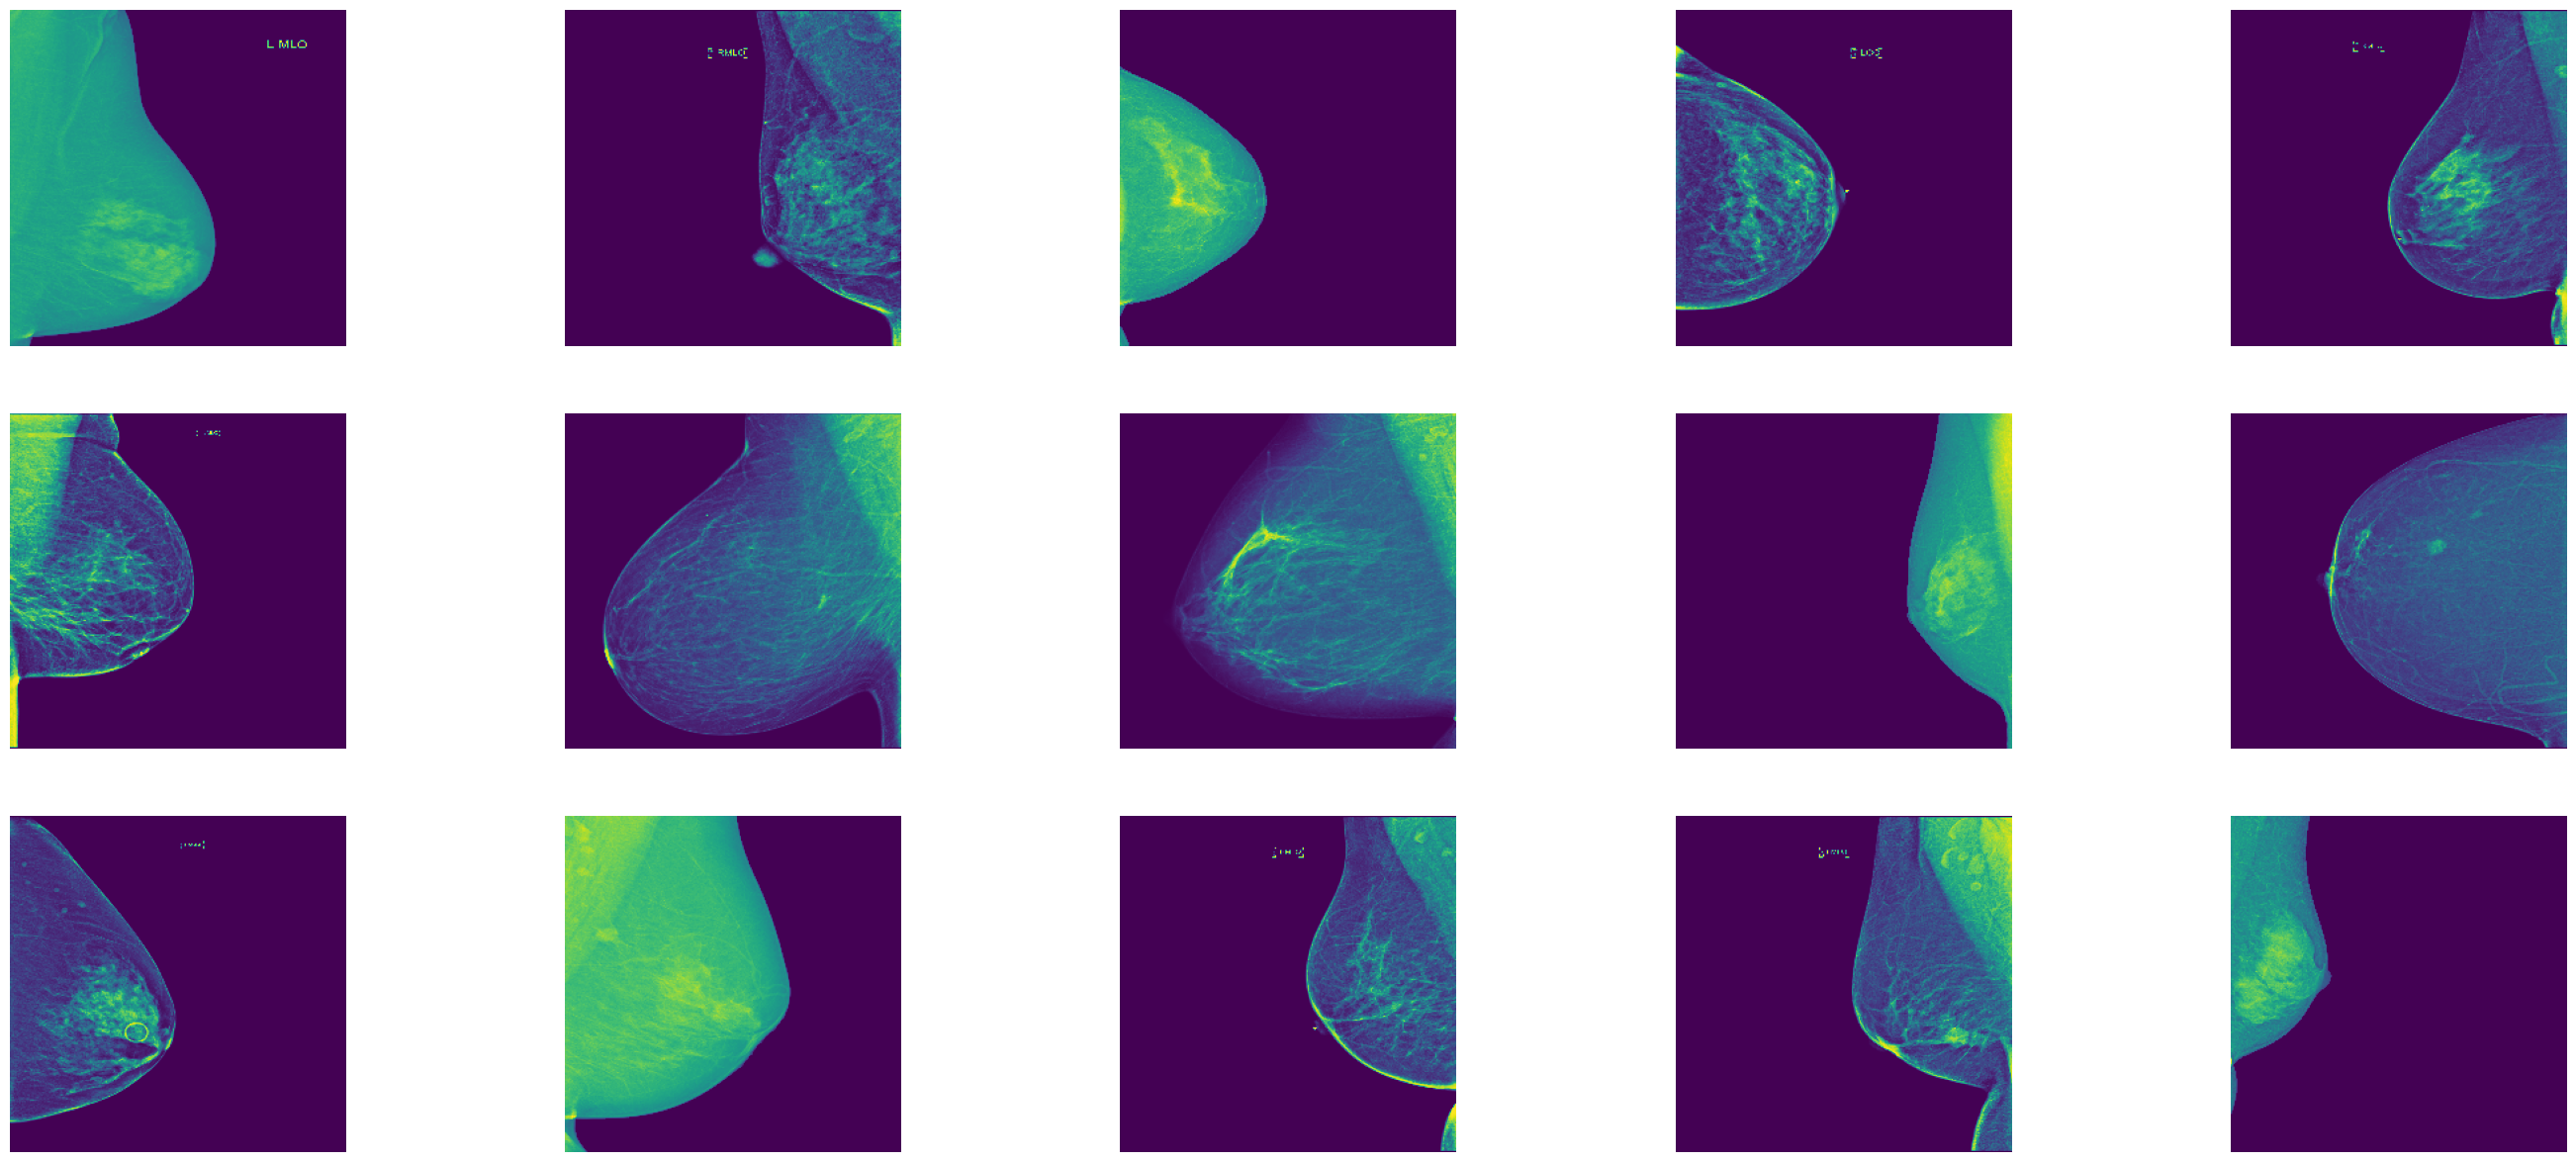

In [149]:
plot_images("new_train.csv")

In [138]:
def function():
    a = int(tf.random.normal(shape=()))
    tf.print(a)

    constant = tf.convert_to_tensor([a])
    tf.print(constant)

In [139]:
function

<function __main__.function()>

In [140]:
wrapped = tf.function(function)
wrapped()

0
[0]
